# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных 

1) Смотрим на случайные строчки. 

2) Смотрим, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info().

In [3]:
data = pd.read_csv('/train_Kaggle_DLS.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [4]:


# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
for col in cat_cols:
    print(data[col].value_counts())
    print('')

Male      2655
Female    2627
Name: Sex, dtype: int64

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

No     2705
Yes    2577
Name: HasPartner, dtype: int64

No     3676
Yes    1606
Name: HasChild, dtype: int64

Yes    4761
No      521
Name: HasPhoneService, dtype: int64

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: in

In [6]:

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'IsSeniorCitizen',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod'
]

binar_cols = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]
feature_cols = num_cols + cat_cols + binar_cols
target_col = 'Churn'

In [7]:
data['TotalSpent'].replace([' '],['0'],inplace=True) 
data['TotalSpent']= data['TotalSpent'].astype(float)

In [8]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [10]:
data.isna()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5278,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5280,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isna().mean()

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

## Анализ данных 

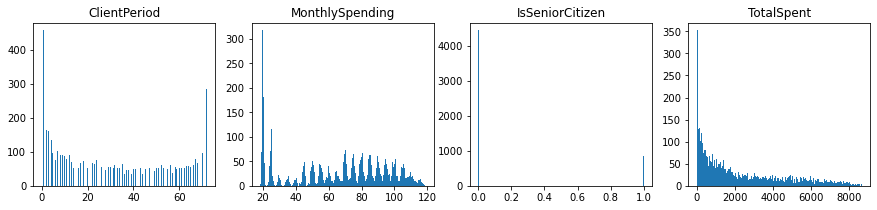

In [12]:

fig, axs = plt.subplots(1, 4, figsize=(15, 3))
plt.rcParams['font.size'] = '10'
for i in range(4):
    axs[i].hist(data[num_cols[i]], bins = 200)
    axs[i].set_title(num_cols[i])



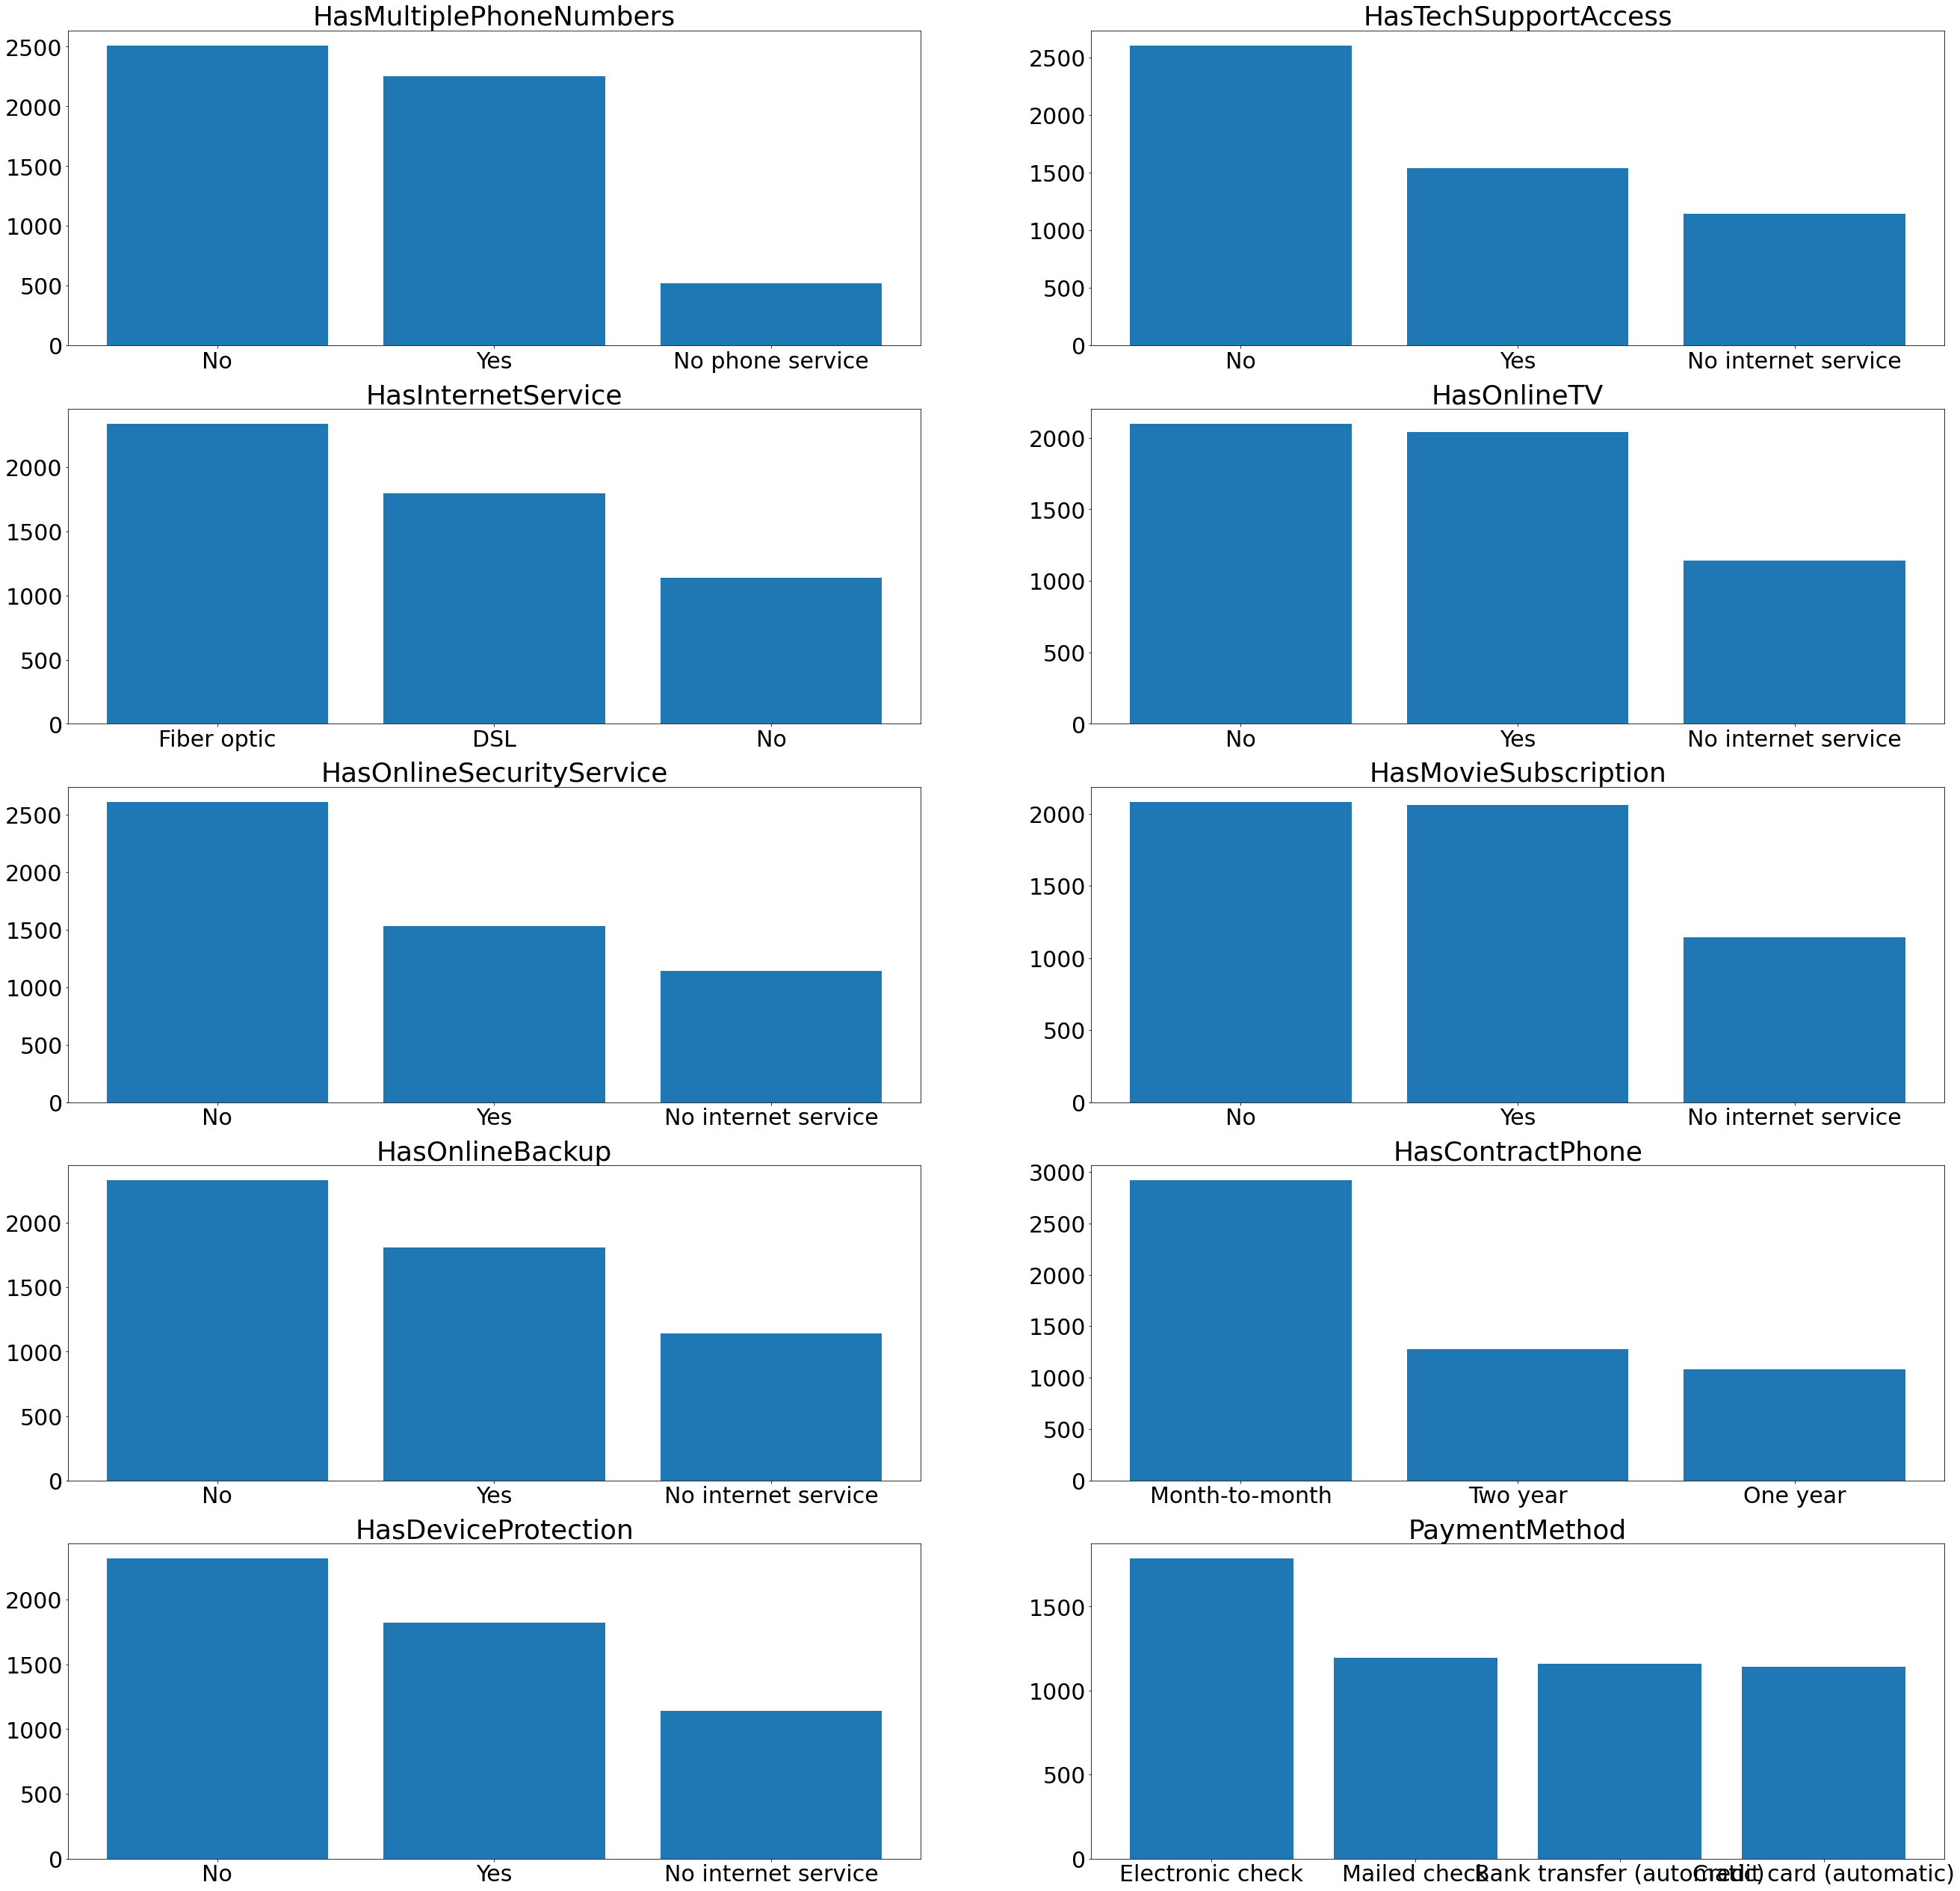

In [18]:
fig, axs = plt.subplots(5, 2, figsize=(45, 45))
a = 0
plt.rcParams['font.size'] = '30'
for i in range(len(cat_cols)):
    if i > 4:
        a = 1
    axs[i%5][a].bar(data[cat_cols[i]].value_counts().keys(), data[cat_cols[i]].value_counts())
    axs[i%5][a].set_title(cat_cols[i])


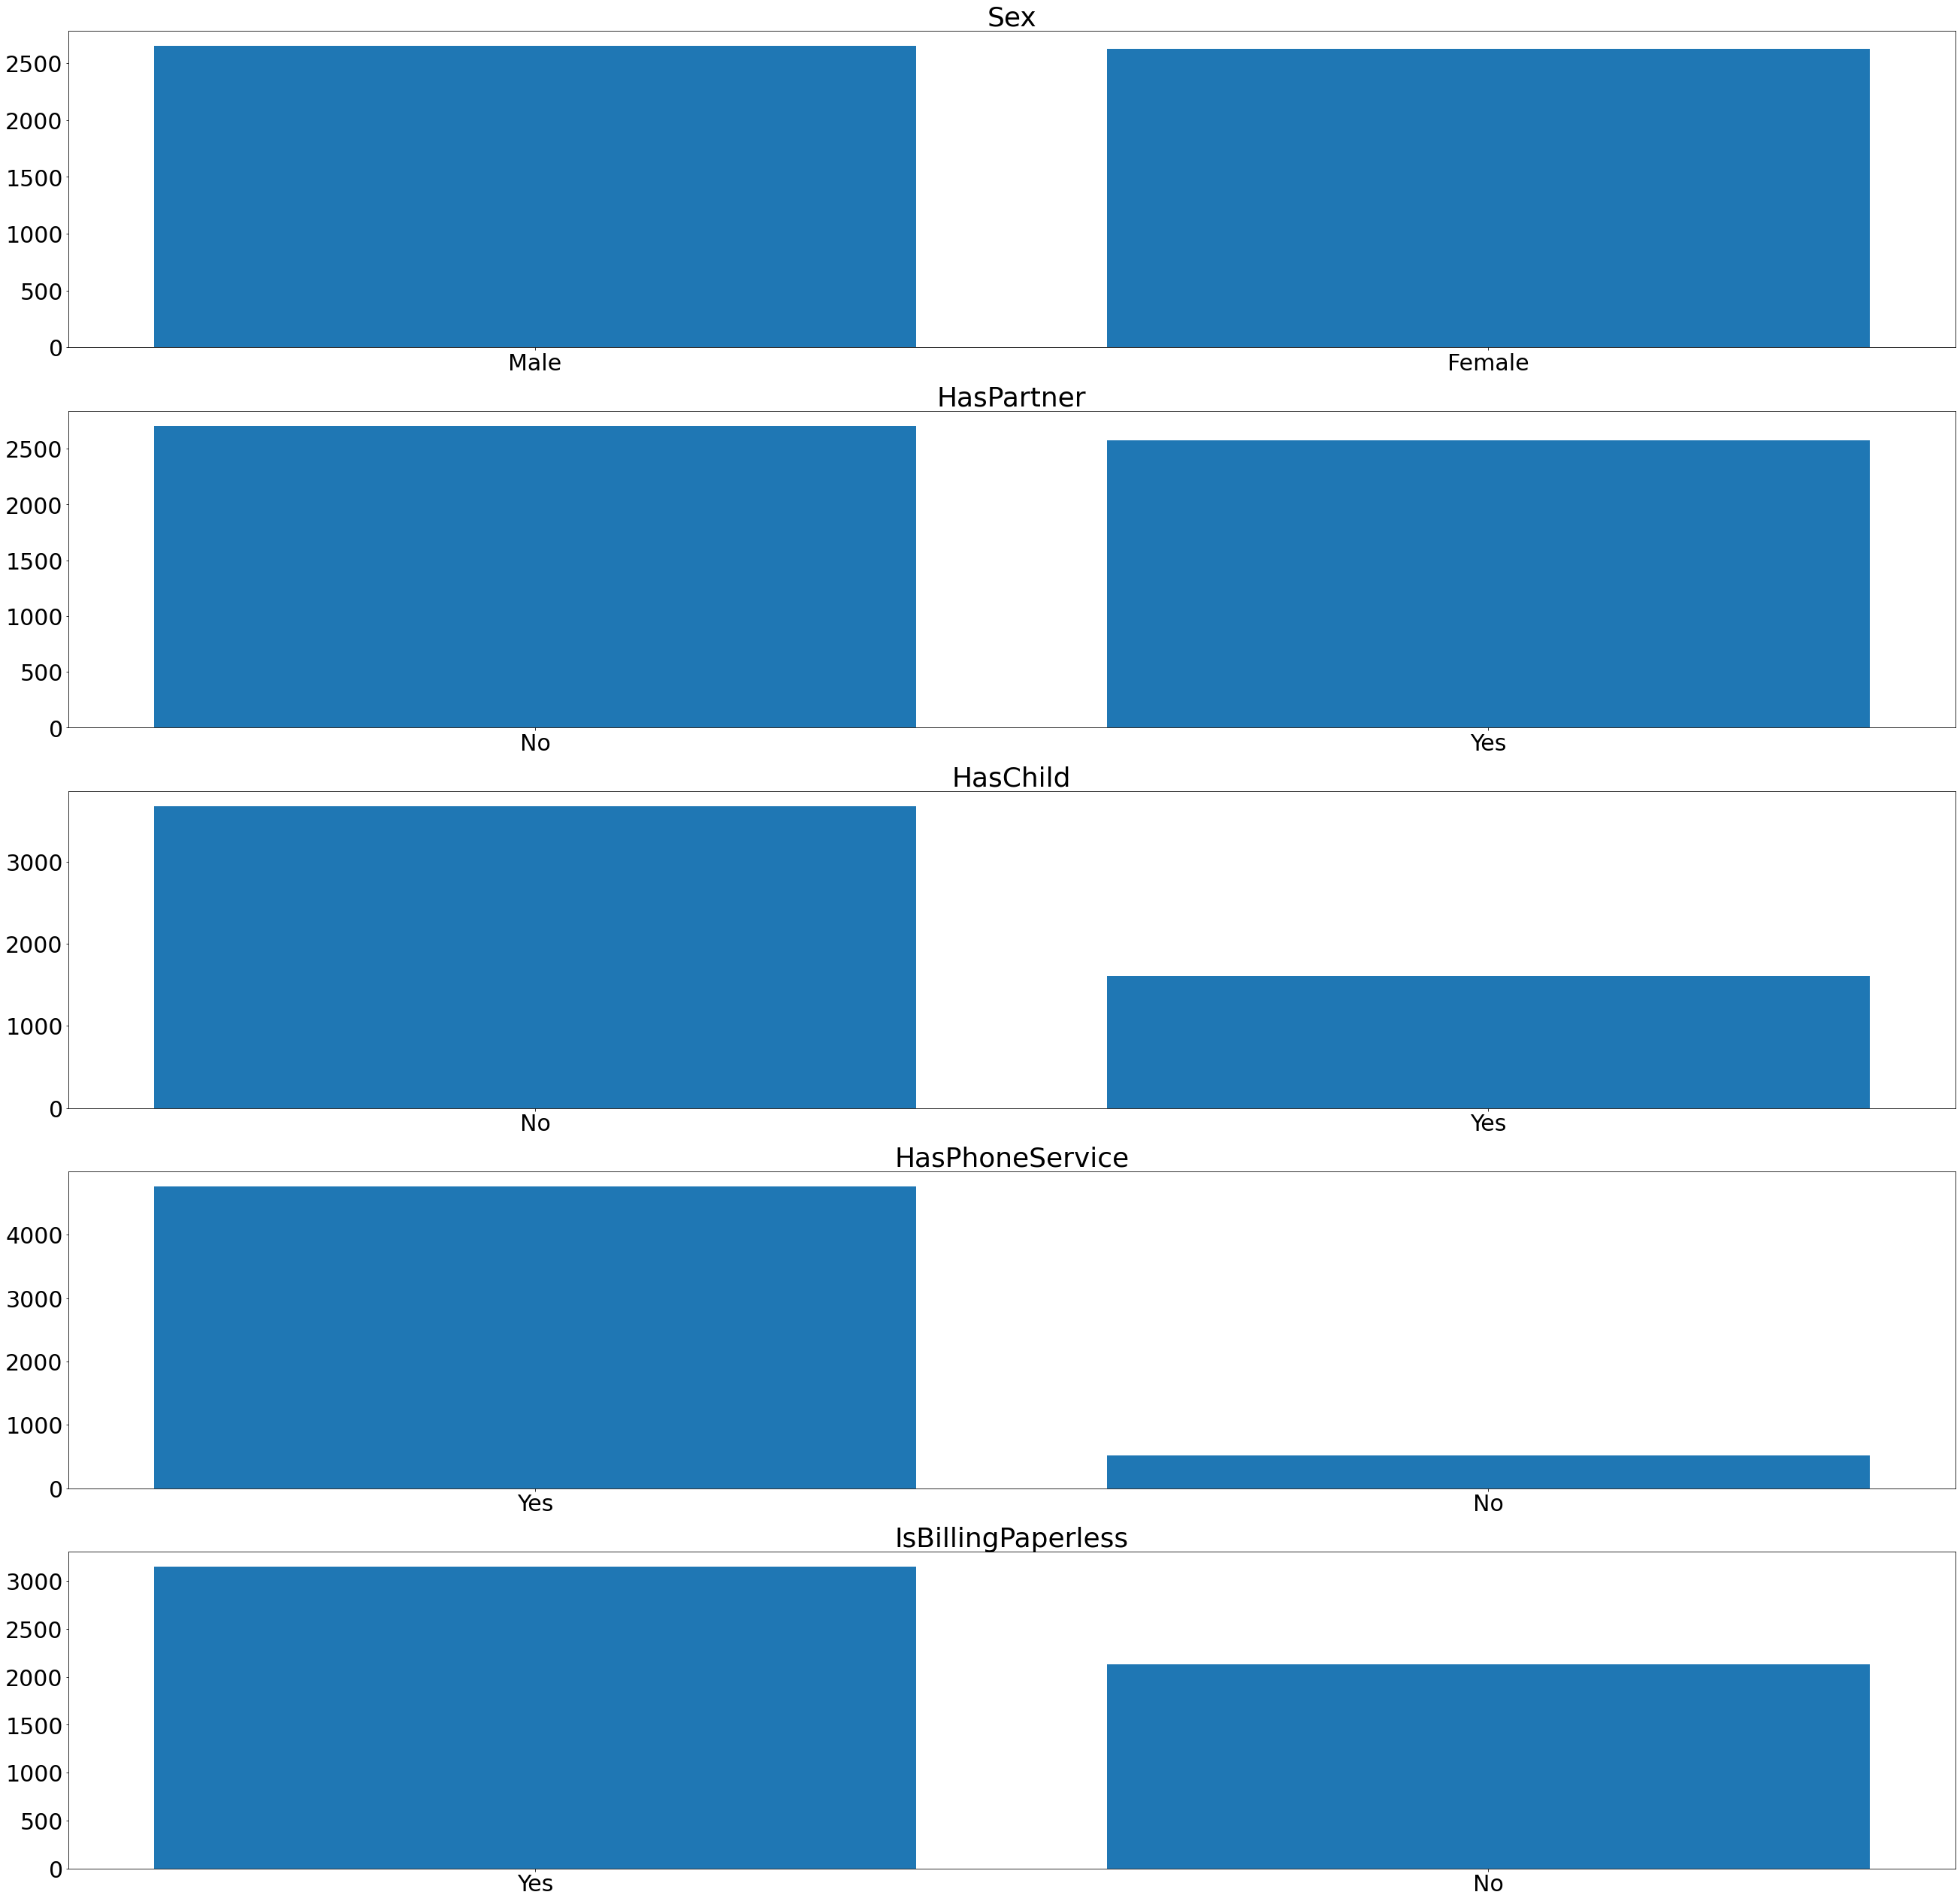

In [14]:
fig, axs = plt.subplots(5, 1, figsize=(45, 45))
plt.rcParams['font.size'] = '30'
for i in range(len(binar_cols)):
    axs[i%5].bar(data[binar_cols[i]].value_counts().keys(), data[binar_cols[i]].value_counts())
    axs[i%5].set_title(binar_cols[i])


<AxesSubplot:>

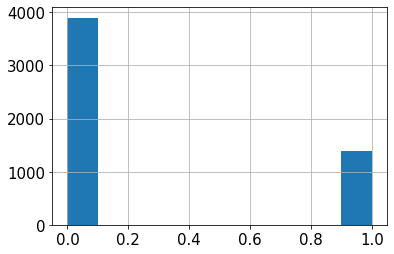

In [15]:
plt.rcParams['font.size'] = '15'
data[target_col].hist()

## Применение линейных моделей 

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [20]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols])
data[num_cols] = pca.transform(data[num_cols])

In [21]:
data = pd.get_dummies(data, columns=cat_cols)

In [22]:
columns_cat_new = []
for col_name in cat_cols:
    columns_cat_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = columns_cat_new

In [23]:
for col in binar_cols[1:]:
    data[col] =  data[col].replace(to_replace = ['Yes', 'No'], value = [1, 0]) 


In [24]:
data['Sex'] =  data['Sex'].replace(to_replace = ['Male', 'Female'], value = [1, 0])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[num_cols+cat_cols+binar_cols], data[target_col], train_size=0.8)

In [28]:
lg = LogisticRegression(solver = 'saga', C=0.2, max_iter = 1000)
lg.fit(X_train, y_train)
preds = lg.predict_proba(X_test) 
preds = [preds[i][1] for i in range(len(preds))]
print(roc_auc_score(y_test, preds))


0.8489242997439719


In [29]:
lg = LogisticRegressionCV(scoring='roc_auc',max_iter = 1000, cv=5, refit=True)
lg.fit(X_train, y_train)
preds = lg.predict_proba(X_test) 
preds = [preds[i][1] for i in range(len(preds))]
print(roc_auc_score(y_test, preds))

0.8490293859146318


## Применение градиентного бустинга 

In [72]:
data = pd.read_csv('/train_Kaggle_DLS.csv')
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'IsSeniorCitizen',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod'
]

binar_cols = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]
feature_cols = num_cols + cat_cols + binar_cols
target_col = 'Churn'
data['TotalSpent'].replace([' '],['0'],inplace=True) 
data['TotalSpent']= data['TotalSpent'].astype(float)

In [73]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], train_size=0.9)

In [62]:
import catboost
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols + binar_cols)
boosting_model.fit(X_train, y_train, verbose=False)
    

In [77]:
preds = boosting_model.predict_proba(data[feature_cols]) 
preds = [preds[i][1] for i in range(len(preds))]
print(roc_auc_score(data[target_col], preds))

0.8866747843120973


# Предсказания

In [78]:
X_test = pd.read_csv('/test_Kaggle_DLS.csv')
X_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [79]:
X_test['TotalSpent'].replace([' '],['0'],inplace=True) 
X_test['TotalSpent']= X_test['TotalSpent'].astype(float)

In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [81]:
submission = pd.read_csv('/submission_Kaggle.csv')

In [82]:
preds = boosting_model.predict_proba(X_test[feature_cols])
preds = [preds[i][1] for i in range(len(preds))]

In [84]:
submission['Churn'] = preds 
submission.to_csv('./my_submission.csv')

In [90]:
output = pd.DataFrame({'Id': X_test.index,
                       'Churn': preds})
output.to_csv('/submission.csv', index=False)

In [91]:
output

,Id,Churn
0,0,0.035146
1,1,0.718396
2,2,0.668000
3,3,0.012098
4,4,0.003064
...,...,...
1756,1756,0.084975
1757,1757,0.013628
1758,1758,0.839651
1759,1759,0.526139


Описание того, что было. В признаке TotalSpent значения ' ' были заменены на нули и переведем тип данных в флоат. Так же бинарные признаки, а именно те, где всего 2 различных значения, была произведена замена на 0 и 1. Приминение нормализации и one-hot-encoding. В начале я хотел построить baseline на всех предлагаемых моделях и посмотреть на качество. И качество даже с минимальными преобазованиями на регресии было более 83%, а на бустинге более 85% причем переобучения не было(проверялось качество на трейне и на всем датасете и оно было выше валидации). 
Что можно сделать еще. Можно построить таблицу корреляции и убрать слабокоррелирующие признаки с таргетом и сильнокоррелирующие признакие друг с другом. Это должно поднять качество. Также в числовых признаках можно убрать выбросы хотя бы 95 квантиля. Также нужно разобраться с балансировкой таргета например используя алгоритм SMOTE. Так же никто не отменял эксперименты с параметрами, в регрессии. Это С, решатель(например saga) lr и др., в бустинге это как минимум lr и кол-во деревьев, но можно поиграться и с лосс функцией.